In [5]:
!pip install -q kagglehub

In [13]:
!pip install -q rarfile

In [88]:
import pandas as pd
import numpy as np
import kagglehub
import os
import zipfile
import sqlite3
import plotly.express as px

##### EXPLORAÇÃO DADOS SOBRE CASAS A VENDA - PONTA GROSSA PR

#### **********

In [511]:
def extrair_arquivo_zip(caminho_zip, destino):
    """
    Extrai o conteúdo de um arquivo .zip para o diretório defindio.
    
    parametro caminho_zip ->  Caminho do arquivo .zip
    parametro destino -> Diretório onde os arquivos vai ser extraídos
    """
    try:
        if zipfile.is_zipfile(caminho_zip):
            with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
                zip_ref.extractall(destino)
                print(f"Arquivos extraídos com sucesso para: {destino}")
        else:
            print("O arquivo especificado não é um arquivo .zip válido.")
    except Exception as e:
        print(f"Erro ao extrair o arquivo: {e}")

caminho_zip = "C:\\Users\\Mateus\\Desktop\\AnalistaDeDados\\AplicaçãoEstudos\\archive.zip"
destino = "C:\\Users\\Mateus\\Desktop\\AnalistaDeDados\\AplicaçãoEstudos\\DadosBrutos"

In [513]:
extrair_arquivo_zip(caminho_zip, destino)

Arquivos extraídos com sucesso para: C:\Users\Mateus\Desktop\AnalistaDeDados\AplicaçãoEstudos\DadosBrutos


In [37]:
os.chdir('C:\\Users\\Mateus\\Desktop\\AnalistaDeDados\\AplicaçãoEstudos\\DadosBrutos')
dados_imob = pd.read_csv('casas_ponta_grossa.csv',delimiter=',')

In [65]:
dados_imob.head()

,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
0,132860-4,3.0,2.0,0.0,2.0,Uvaranas,164.0,430000.0
1,148460-4,3.0,2.0,1.0,3.0,Jardim Carvalho,NaN,350000.0
2,154166-4,3.0,1.0,1.0,1.0,Oficinas,NaN,300000.0
3,146507-4,3.0,2.0,1.0,2.0,Uvaranas,80.0,169900.0
4,154050-4,2.0,1.0,0.0,1.0,Uvaranas,NaN,165000.0


#### ANÁLISE EXPLORATÓRIA

In [76]:
dados_imob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1681 entries, 0 to 3575
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Referência        1681 non-null   object 
 1   Quartos           1681 non-null   float64
 2   Banheiros         1681 non-null   float64
 3   Suítes            1681 non-null   float64
 4   Vagas de Garagem  1681 non-null   float64
 5   Bairro            1681 non-null   object 
 6   Área Total        1681 non-null   float64
 7   Valor Venda       1681 non-null   float64
dtypes: float64(6), object(2)
memory usage: 118.2+ KB


In [74]:
# decidido droppar registros nulos, sem possiveis de inferencia, não sera aplicado algoritimos de ml -> regressão linear para prever valores (valor venda)
dados_imob.dropna(inplace=True)

In [78]:
dados_imob.head()

,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
0,132860-4,3.0,2.0,0.0,2.0,Uvaranas,164.0,430000.0
3,146507-4,3.0,2.0,1.0,2.0,Uvaranas,80.0,169900.0
5,120001-4,1.0,1.0,0.0,2.0,Boa Vista,360.0,150000.0
9,147038-4,2.0,1.0,0.0,1.0,Uvaranas,40.0,130000.0
11,126629-4,2.0,1.0,0.0,1.0,Contorno / Sta. Paula,45.0,126900.0


#### TRANSFORMANDO COLUNAS FLOAT -> INTEIRO

In [84]:
dados_imob['Quartos'] = dados_imob['Quartos'].astype(np.int64)
dados_imob['Banheiros'] = dados_imob['Banheiros'].astype(np.int64)
dados_imob['Suítes'] = dados_imob['Suítes'].astype(np.int64)
dados_imob['Vagas de Garagem'] = dados_imob['Vagas de Garagem'].astype(np.int64)

In [86]:
dados_imob.head(10)

,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
0,132860-4,3,2,0,2,Uvaranas,164.0,430000.0
3,146507-4,3,2,1,2,Uvaranas,80.0,169900.0
5,120001-4,1,1,0,2,Boa Vista,360.0,150000.0
9,147038-4,2,1,0,1,Uvaranas,40.0,130000.0
11,126629-4,2,1,0,1,Contorno / Sta. Paula,45.0,126900.0
15,126900-4,4,1,1,4,Estrela,249.0,650000.0
17,134592-4,4,6,2,3,Estrela,990.0,1800000.0
18,142989-4,6,4,1,4,Uvaranas,638.0,1250000.0
19,102109-4,3,4,1,2,Orfãs,335.0,1100000.0
20,134491-4,3,4,1,4,Uvaranas,194.0,700000.0


#### VERIFICANDO O COMPORTAMENTO DOS VALORES CATEGÓRICOS

In [214]:
dados_imob['Bairro'].unique()

array([' Uvaranas', ' Boa Vista', ' Contorno / Sta. Paula', ' Estrela',
       ' Orfãs', ' Jardim Carvalho', ' Oficinas', ' Neves', ' Chapada',
       ' Nova Rússia', ' Ronda', ' Centro', ' Colônia Dona Luiza',
       ' Olarias', ' Cará-cará'], dtype=object)

#### VALORES DOS BAIRROS TEM COMO PADRÃO ESPAÇO LEFT ANTES DOS NOMES, A FIM DE ORGANIZAÇÃO, IREI NORMALIZAR

In [219]:
dados_imob['Bairro'] = dados_imob['Bairro'].str.lstrip()

In [221]:
dados_imob['Bairro'].unique()

array(['Uvaranas', 'Boa Vista', 'Contorno / Sta. Paula', 'Estrela',
       'Orfãs', 'Jardim Carvalho', 'Oficinas', 'Neves', 'Chapada',
       'Nova Rússia', 'Ronda', 'Centro', 'Colônia Dona Luiza', 'Olarias',
       'Cará-cará'], dtype=object)

In [104]:
quartos_dist = dados_imob['Quartos'].value_counts()

In [130]:
quartos_dist

Quartos
3    976
2    364
4    261
5     51
1     13
6     13
7      2
8      1
Name: count, dtype: int64

In [235]:
prc_quartos = dados_imob['Quartos'].value_counts(normalize=True)*100

In [237]:
prc_quartos

Quartos
3    58.060678
2    21.653778
4    15.526472
5     3.033908
1     0.773349
6     0.773349
7     0.118977
8     0.059488
Name: proportion, dtype: float64

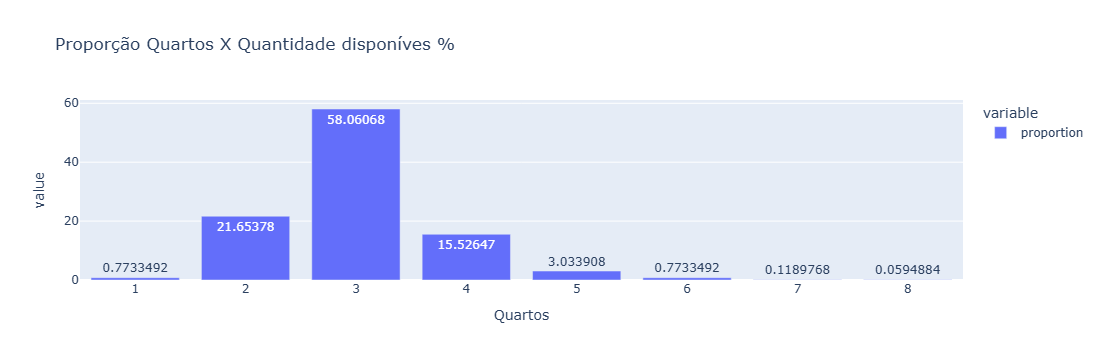

In [247]:
px.bar(
    prc_quartos,
    text_auto=True,
    labels={'count': 'Quantidade'},
    title='Proporção Quartos X Quantidade disponíves %',
)

#### DISTRIBUIÇÃO QUANTIDADE DE IMOVEIS E O NUMERO DE QUARTOS

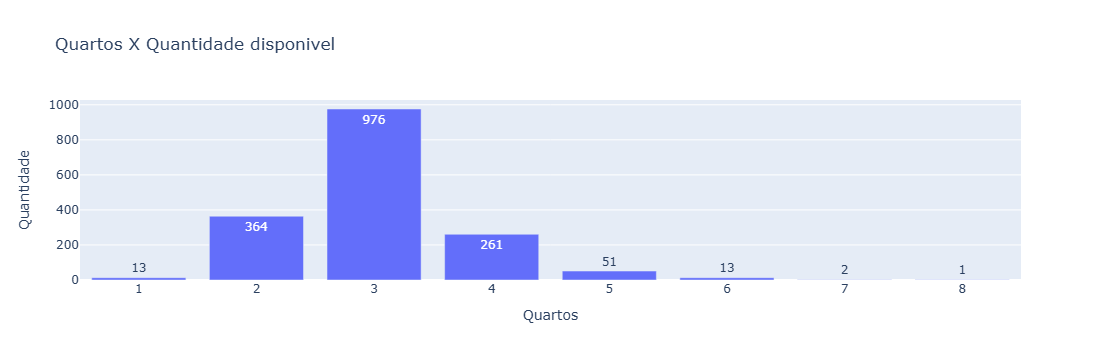

In [186]:
px.bar(
    quartos_dist,
    y='count',
    text_auto=True,
    labels={'count': 'Quantidade'},
    title='Quartos X Quantidade disponivel'
)

#### QUAIS SÃO OS BAIRROS COM AS PROPRIEDADES MAIS CARAS?

In [178]:
bairros_valor_venda = dados_imob.groupby('Bairro')[['Valor Venda']].sum().reset_index()

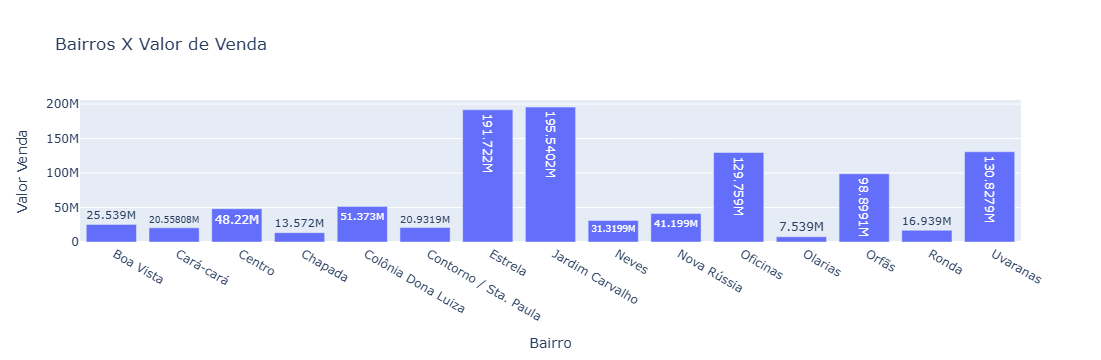

In [225]:
px.bar(
    bairros_valor_venda,
    x=bairros_valor_venda['Bairro'],
    y=bairros_valor_venda['Valor Venda'],
    text_auto=True,
    labels={'count': 'Valor Venda'},
    title='Bairros X Valor de Venda'
)

#### MOTIVOS DOS BAIRROS ESTRELA E JARDIM CARVALHO TEREM OS IMOVEIS MAIS CAROS DENTRO DO DATASET

### ******************

#### MÉDIA DE VALORES NO BAIRRO ESTRELA 

In [265]:
validacao_bairros_mais_caros_estrela = dados_imob.loc[dados_imob['Bairro'] == 'Estrela']

In [267]:
validacao_bairros_mais_caros_estrela.groupby('Bairro')[['Quartos','Banheiros','Suítes','Vagas de Garagem','Área Total']].mean().reset_index()

,Bairro,Quartos,Banheiros,Suítes,Vagas de Garagem,Área Total
0,Estrela,3.348837,3.238372,1.575581,2.656977,335.988372


### ******************

#### MÉDIA DE VALORES NO BAIRRO JARDIM CARVALHO

In [269]:
validacao_bairros_mais_caros_jardim_carvalho = dados_imob.loc[dados_imob['Bairro'] == 'Jardim Carvalho']

In [282]:
validacao_bairros_mais_caros_jardim_carvalho.groupby('Bairro')[['Quartos','Banheiros','Suítes','Vagas de Garagem','Área Total']].mean().reset_index()

,Bairro,Quartos,Banheiros,Suítes,Vagas de Garagem,Área Total
0,Jardim Carvalho,3.151625,2.736462,1.151625,2.33574,248.350181


### ****************** 

#### MÉDIA DE VALORES NOS BAIRROS MENOS VALORIZADOS

In [289]:
validacao_bairros_menos_valorizados_olarias = dados_imob.loc[dados_imob['Bairro']=='Olarias']
validacao_bairros_menos_valorizados_chapada = dados_imob.loc[dados_imob['Bairro']=='Chapada']

#### MÉDIA DOS VALORES DO BAIRRO OLARIAS

In [291]:
validacao_bairros_menos_valorizados_olarias.groupby('Bairro')[['Quartos','Banheiros','Suítes','Vagas de Garagem','Área Total']].mean().reset_index()

,Bairro,Quartos,Banheiros,Suítes,Vagas de Garagem,Área Total
0,Olarias,2.842105,1.947368,0.368421,1.631579,227.789474


#### MÉDIA DOS VALORES DO BAIRRO CHAPADAS

In [313]:
validacao_bairros_menos_valorizados_chapada.groupby('Bairro')[['Quartos','Banheiros','Suítes','Vagas de Garagem','Área Total']].mean().reset_index()

,Bairro,Quartos,Banheiros,Suítes,Vagas de Garagem,Área Total
0,Chapada,2.947368,2.184211,0.657895,1.973684,264.605263


### ****************** 

#### QUAIS SÃO OS BAIRROS COM MAIOR NÚMERO DE REGISTROS NO DATASET?

In [331]:
con_bairros = dados_imob['Bairro'].value_counts()

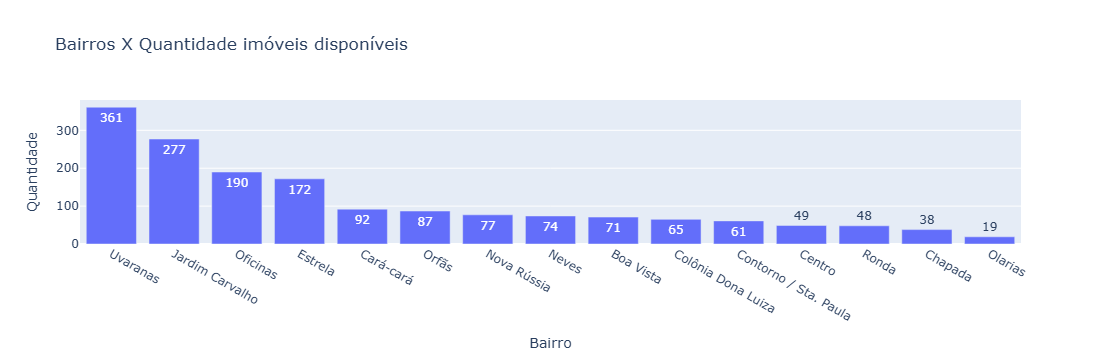

In [335]:
px.bar(con_bairros)


px.bar(
    con_bairros,
    y='count',
    text_auto=True,
    labels={'count': 'Quantidade'},
    title='Bairros X Quantidade imóveis disponíveis'
)

### ****************** 

#### DESENVOLVIDO FUNÇÃO PARA PROCURAR IMOVEIS, CONFORME O VALOR DESEJADO

In [369]:
def procurarValor():
    valorVenda = int(input('Digite um valor que deseja encontrar um empreendimento'))
    menorMaior = input(f'Digite > (Maior valor) que: {valorVenda} | < (Menor valor) que {valorVenda} | ou = (o valor exato) ao valor de: {valorVenda}')
    if(menorMaior == '>'):
        return dados_imob.loc[dados_imob['Valor Venda'] > valorVenda]
    elif(menorMaior == '<'):
        return dados_imob.loc[dados_imob['Valor Venda'] < valorVenda]
    elif(menorMaior == '='):
        return dados_imob.loc[dados_imob['Valor Venda'] == valorVenda]

In [382]:
procurarValor()

Digite um valor que deseja encontrar um empreendimento 400000
Digite > (Maior valor) que: 400000 | < (Menor valor) que 400000 | ou = (o valor exato) ao valor de: 400000 >


,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
0,132860-4,3,2,0,2,Uvaranas,164.0,430000.0
15,126900-4,4,1,1,4,Estrela,249.0,650000.0
17,134592-4,4,6,2,3,Estrela,990.0,1800000.0
18,142989-4,6,4,1,4,Uvaranas,638.0,1250000.0
19,102109-4,3,4,1,2,Orfãs,335.0,1100000.0
...,...,...,...,...,...,...,...,...
3564,21910-4,3,3,1,2,Neves,300.0,730000.0
3570,154858-4,4,4,1,6,Boa Vista,640.0,700000.0
3572,106906-4,3,5,2,2,Uvaranas,314.0,700000.0
3574,81553-4,4,3,1,2,Nova Rússia,400.0,700000.0


#### BAIRROS E SUAS DISTRIBUIÇÕES DE ÁREA

In [385]:
dados_imob['Área Total'].value_counts()

Área Total
300.0     63
100.0     44
80.0      34
200.0     32
120.0     29
          ..
1097.0     1
292.0      1
585.0      1
785.0      1
474.0      1
Name: count, Length: 405, dtype: int64

In [393]:
area_total_por_bairro = dados_imob.groupby('Bairro')['Área Total'].sum().reset_index()

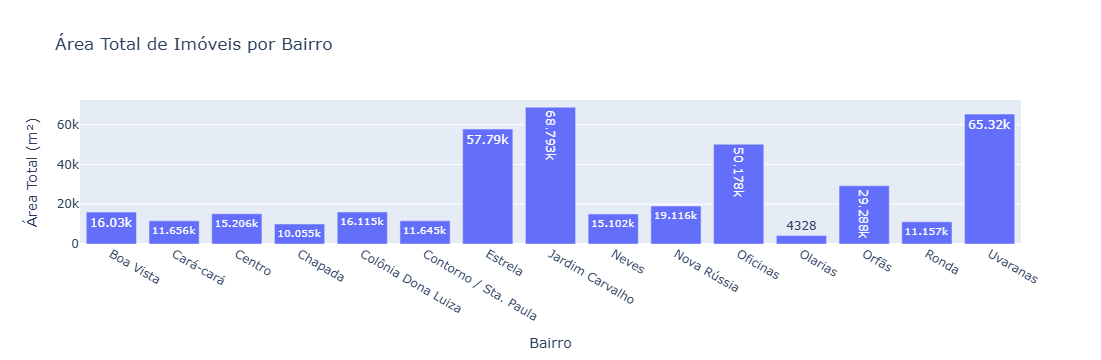

In [398]:
px.bar(
    area_total_por_bairro, 
    x='Bairro', 
    y='Área Total', 
    title='Área Total de Imóveis por Bairro',
    text_auto=True,
    labels={'Área Total': 'Área Total (m²)', 'Bairro': 'Bairro'}
)

In [505]:
def quantidadeVagasCarro():
    qtdVagas = int(input('Digite a quantidade de vagas de estacionamento desejadas'))
    bairros = [bairr for  bairr in dados_imob['Bairro'].unique()]
    bairro = input(f'Esse são os bairros disponiveis: {bairros}')
    return  dados_imob.loc[(dados_imob['Vagas de Garagem'] == qtdVagas) & (dados_imob['Bairro'] == bairro)]

In [507]:
quantidadeVagasCarro()

Digite a quantidade de vagas de estacionamento desejadas 2
Esse são os bairros disponiveis: ['Uvaranas', 'Boa Vista', 'Contorno / Sta. Paula', 'Estrela', 'Orfãs', 'Jardim Carvalho', 'Oficinas', 'Neves', 'Chapada', 'Nova Rússia', 'Ronda', 'Centro', 'Colônia Dona Luiza', 'Olarias', 'Cará-cará'] Boa Vista


,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
5,120001-4,1,1,0,2,Boa Vista,360.0,150000.0
157,126151-4,5,3,1,2,Boa Vista,215.0,590000.0
177,148981-4,3,2,1,2,Boa Vista,205.0,560000.0
196,103091-4,3,3,1,2,Boa Vista,480.0,550000.0
369,20888-4,3,3,1,2,Boa Vista,735.0,450000.0
482,107134-4,4,2,0,2,Boa Vista,409.0,410000.0
506,131513-4,3,2,0,2,Boa Vista,420.0,400000.0
538,130977-4,3,3,0,2,Boa Vista,210.0,390000.0
600,130557-4,2,2,0,2,Boa Vista,120.0,370000.0
648,130822-4,3,3,1,2,Boa Vista,180.0,350000.0
